In [1]:
## Author: Hongyi Zhang
## Loading Data
import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\zhy92\\Desktop\\Stevens Master\\Classes\\2020 Spring\\CPE -695-WS Applied Machine Learning\\HW2\\Problem\\data2.txt",header=None).values

In [2]:
## Plot the data
x=data[:,0]
y=data[:,1]
import matplotlib.pyplot as plt
plt.plot(x,y,'.',color='red')

In [3]:
## Normal Equation
x1= np.c_[np.ones((97,1)),x]
Coef =np.linalg.inv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y))
print(Coef)

[-3.89578088  1.19303364]


In [4]:
## Cost_function
def costFunction(x,y,theta):
    cost=np.sum((x.dot(theta)-y)**2)/(2*len(y))
    return cost

costFunction(x1,y,Coef)

4.476971375975179

In [5]:
## Batch
def batch(x,y,alpha,iterations):
    theta=np.array([0,0])
    history=np.zeros((iterations,1))
    for i in range(iterations):
        #gradient=x.T.dot(x.dot(theta)-y)/len(y)
        theta=theta-alpha*(x.T.dot(x.dot(theta)-y)/len(y))
        history[i]=costFunction(x,y,theta)
    return theta,'cost is',min(history[i])
## the iteration I choose is 1000
batch(x1,y,0.024,1000)

(array([-3.84372626,  1.18780419]), 'cost is', 4.477218063976344)

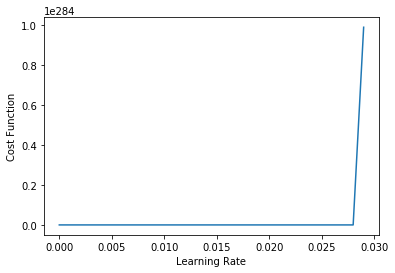

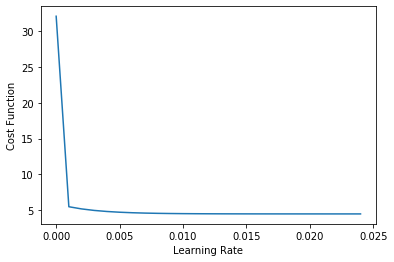

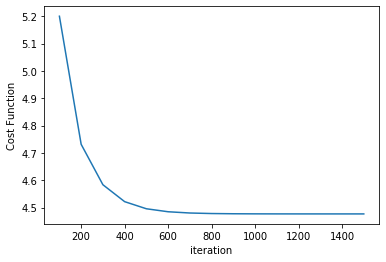

In [6]:
## Choosing the best learning rate
def batch1(x,y,alpha,iterations):
    theta=np.array([0,0])
    history=np.zeros((iterations,1))
    for i in range(iterations):
        #gradient=x.T.dot(x.dot(theta)-y)/len(y)
        theta=theta-alpha*(x.T.dot(x.dot(theta)-y)/len(y))
        history[i]=costFunction(x,y,theta)
    return min(history[i])
## plotting alpha VS cost
alpha_values = []
i=0
while i<0.030:
    b=batch1(x1,y,i,1000)
    b=b.tolist()
    alpha_values.append(b)
    i+=0.001
a=[i/1000 for i in range (0,30)]
plt.plot(a,alpha_values)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.show()

alpha_values = []
i=0
while i<0.025:
    b=batch1(x1,y,i,1000)
    b=b.tolist()
    alpha_values.append(b)
    i+=0.001
a=[i/1000 for i in range (0,25)]
plt.plot(a,alpha_values)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.show()

## plotting iterations VS cost
Cost=[]
i=100
while i<1600:
    c=batch1(x1,y,0.024,i)
    c=c.tolist()
    Cost.append(c)
    i+=100
d=[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
plt.plot(d,Cost)
plt.xlabel('iteration')
plt.ylabel('Cost Function')
plt.show()



The best learning rate I choose is 0.024, after 0.024, the cost will increasing

In [7]:
## Stochastic Gradient Descent
import random
def stochastic(x,y,alpha,iterations):
    a=0
    b=0
    m=len(y)
    history=[]
    for i in range(iterations):
        np.random.shuffle(data)
        for example in data:
            i = random.randint(0,m-1)
            sum0 = a * x[i] + b - y[i]
            sum1 = (a * x[i] + b - y[i])*x[i]
            a = a - sum1*alpha/m
            b = b - sum0*alpha/m
            cost=costFunction(x1,y,[b,a])
            history.append(cost)
    return [b,a]
stochastic(x,y,0.024,1000)

[-3.838349120158383, 1.1463092667160968]

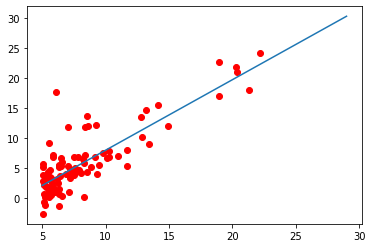

In [8]:
## Graph for regression line (SGD)
b,a = stochastic(x,y,0.024,1000)
X = range(5,30)
Y = [(a*i+b) for i in X]
plt.scatter(x,y,color='red')
plt.plot(X,Y)
plt.show()

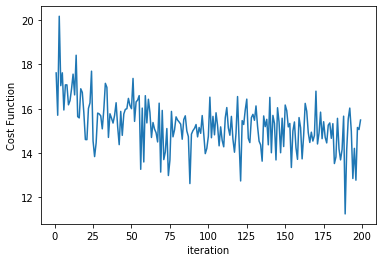

In [9]:
## Graphing
import random
def stochastic(x,y,alpha,iterations):
    a=0
    b=0
    m=len(y)
    history=[]
    for i in range(iterations):
        np.random.shuffle(data)
        for example in data:
            i = random.randint(0,m-1)
            sum0 = a * x[i] + b - y[i]
            sum1 = (a * x[i] + b - y[i])*x[i]
            a = a - sum1*alpha/m
            b = b - sum0*alpha/m
            cost=costFunction(x1,y,[b,a])
            history.append(cost)
    return min(history)
## plotting iterations VS cost (Fix learning rate)
Cost=[]
i=1
while i<200:
    c=stochastic(x,y,0.024,i)
    Cost.append(c)
    i+=1
d = [i*1 for i in range (1,200)]
plt.plot(d,Cost)
plt.xlabel('iteration')
plt.ylabel('Cost Function')
plt.show()

In this case, Batch has a higher accuracy. Since, stochastic gradient descent add more noice to the learning process, so it will have a lower rate of convergence and accuracy. If given iteration is enough. The cost for SDG will be close to an optimal value eventually. 